<a href="https://colab.research.google.com/github/tonymongare/DataScience/blob/isaac/Exploratory_Data_Analysis_on_the_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
#plot will be displayed directly below the cell
%matplotlib inline



In [ ]:
#using pandas to load dataset into the working space
test = pd.read_csv(r"sample_data/test.csv")
train = pd.read_csv(r"sample_data/train.csv")

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#have a look at the columns
print(test.columns)
print(train.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#finding out the datatype of each column in the training data set
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#returns the descriptive statistics of the numerical values i.e age and fare 
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Detecting missing values
print(pd.isnull(train).sum())
print(pd.isnull(test).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
#since cabin has a high percentage of missing values were going to dop this column along with the ticket collumns
train.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [ ]:
#we have drop the Cabin column due to a large number of missing values and the Ticket columns that may contain alot of noise
print(pd.isnull(train).sum())
print(pd.isnull(test).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [ ]:
#The Age columns also contains missing values and we want to impute them using either the mean or the median
train["Age"].fillna(train["Age"].median(), inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)

#Replacing missing values in the Embarked column
train["Embarked"].fillna("S", inplace=True)

#Replacing the missing values in the Fare column in the test dataset
test["Fare"].fillna(test["Fare"].median(), inplace=True)



In [ ]:
#We can now confirm that we have gotten rid of all the missing values in the datasets
print(pd.isnull(train).sum())
print(pd.isnull(test).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


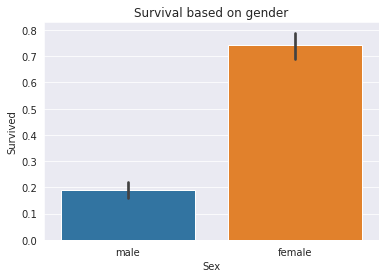

In [ ]:
#Data visualization
#it is evident from the chart below that far more females survived that males
sns.barplot(x="Sex", y="Survived", data= train)
plt.title("Survival based on gender")
plt.show()


In [ ]:
males_survived = train[train.Sex == "male"]["Survived"].sum()
print(males_survived)

109


In [ ]:
females_survived = train[train.Sex == "female"]["Survived"].sum()
print(females_survived)

233


In [ ]:
#total number of people people whose survived
total_survived = males_survived + females_survived
print(total_survived)

342


In [ ]:
percentage_female_survived = (females_survived/total_survived)*100
percentage_male_survived = (males_survived/total_survived)*100
print(percentage_female_survived)
print(percentage_male_survived)

68.12865497076024
31.871345029239766


Text(0.5, 1.0, 'Survival according to the class that the passesenger was in')

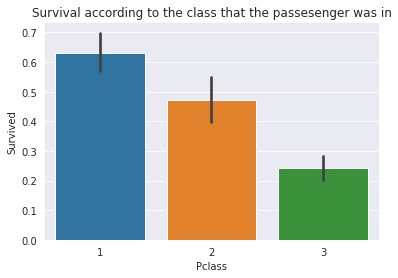

In [ ]:
#survival rates according to passenger class(Pclass)
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival according to the class that the passesenger was in")

In [ ]:
#number of passengers that survived per class
survived_in_class_1 = train[train.Pclass==1]["Survived"].sum()
survived_in_class_2 = train[train.Pclass==2]["Survived"].sum()
survived_in_class_3 = train[train.Pclass==3]["Survived"].sum()
print(survived_in_class_1)
print(survived_in_class_2)
print(survived_in_class_3)

136
87
119


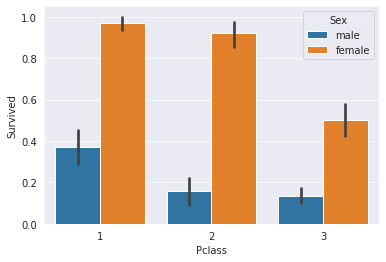

In [ ]:
#survival rates according to passenger class and sex
#it is eveident that in every class more females survived as compared to males 
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train)


Text(0.5, 1.0, 'Survival rate of each sex in the threee classes')

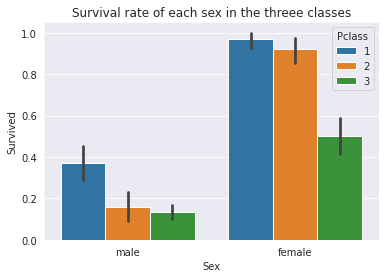

In [ ]:
#in each of the two groups passengers in class 1 were more likely to survive that any of the other classes
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train)
plt.title("Survival rate of each sex in the threee classes")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Those that did not survive according to age')

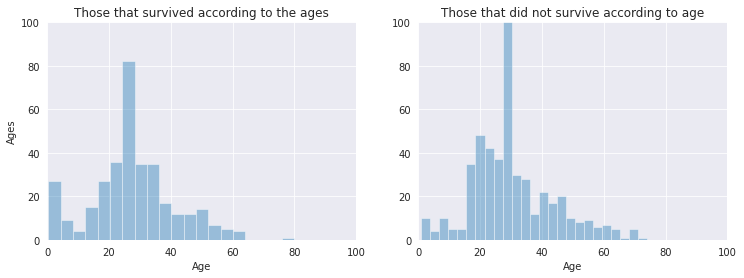

In [ ]:
survived_according_age = train[train.Survived==1]["Age"]
not_survived_according_age = train[train.Survived==0]["Age"]

#creating a subplot
plt.subplot(1, 2, 1)
sns.distplot(survived_according_age, kde=False)
plt.axis([0, 100, 0, 100])

plt.title("Those that survived according to the ages")
plt.ylabel("Ages")

#second subplot
plt.subplot(1, 2, 2)
sns.distplot(not_survived_according_age, kde=False)
plt.axis([0, 100, 0, 100])
plt.subplots_adjust(right=1.7)
plt.title("Those that did not survive according to age")



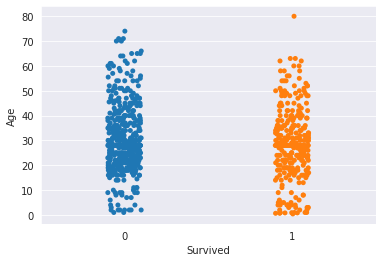

In [ ]:
#stripplot to visualize the underlying distribution of many individual one-dimensional values
#younger passengers had higher survival rates
sns.stripplot(x="Survived", y = "Age", data=train)

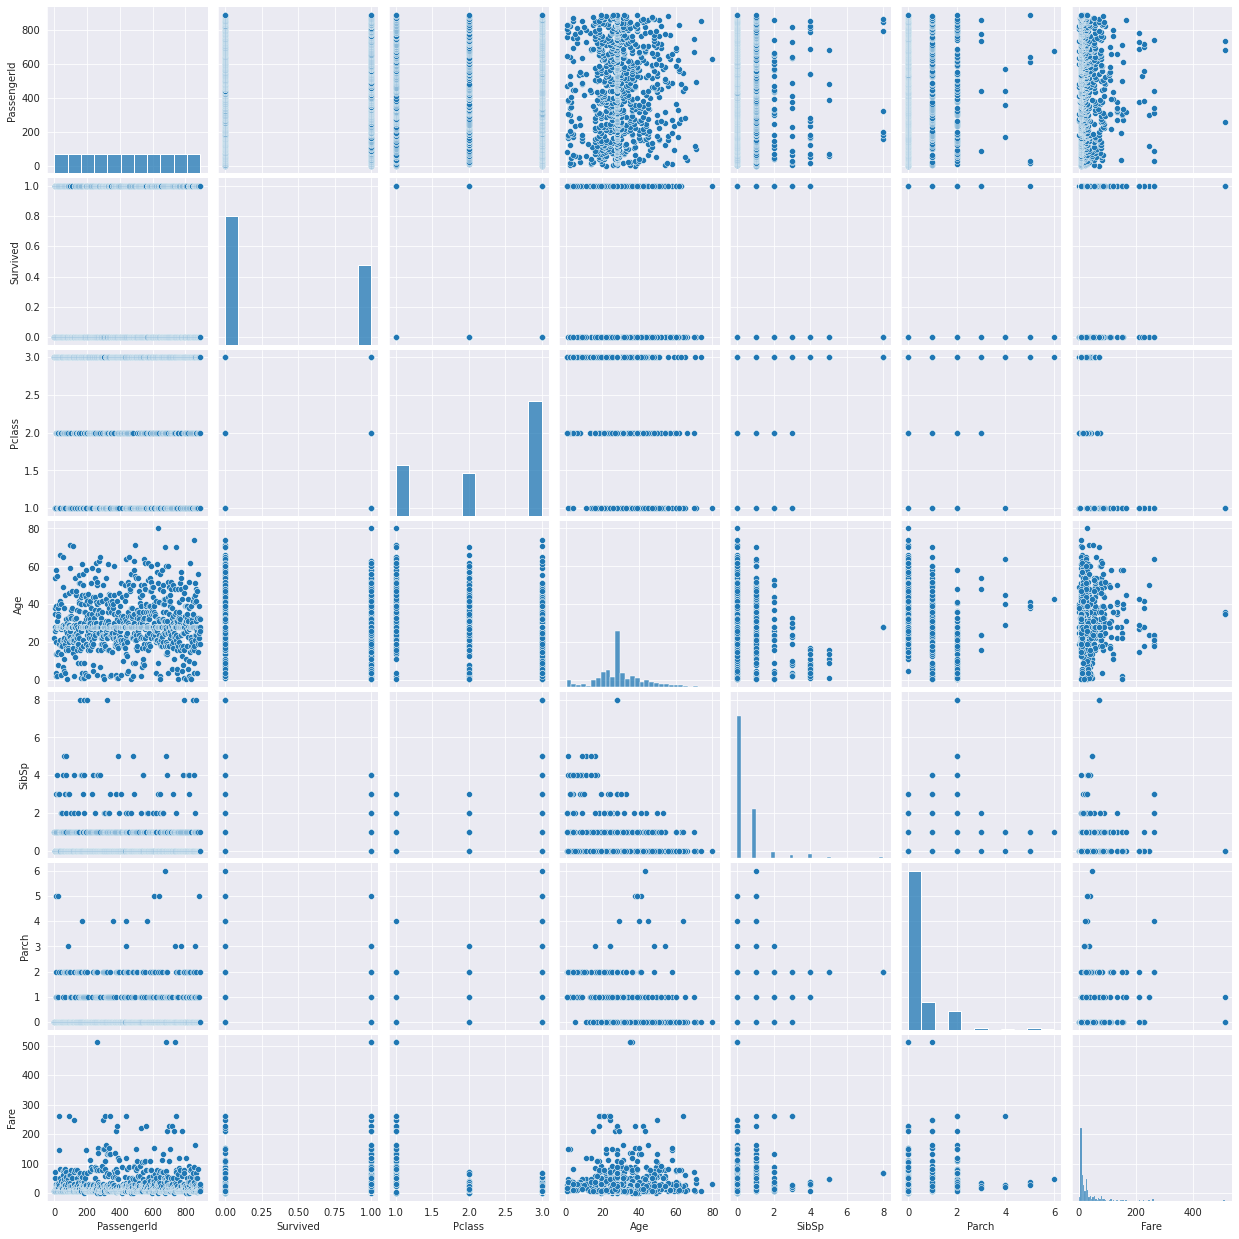

In [ ]:
#plot pairwise relatioships in the training dataset
sns.pairplot(train)

In [ ]:
#converting categorical values in the sex and embarked columns to numerical values
#using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Sex"])

sex_transformed_train = le.transform(train["Sex"])
train["Sex"] = sex_transformed_train

#testing data
sex_transformed_test = le.transform(test["Sex"])
test["Sex"] = sex_transformed_test



In [ ]:
#coverting the embarked column to numerical
le_embarked = LabelEncoder()

#training set
le_embarked.fit(train["Embarked"])

transformed_train_embarked = le_embarked.transform(train["Embarked"])
train["Embarked"] = transformed_train_embarked

#test dataset
transformed_test_embarked = le_embarked.transform(test["Embarked"])
test["Embarked"] = transformed_test_embarked

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2


In [ ]:
#combine number of siblings, spouse and parents into a single column of the total family members on board
#syntentic feature

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = train["SibSp"] + test["Parch"] + 1


In [ ]:
#a new column letting us know if a passenger was alone in the ship or  not set to 1 if so else set to 0
train["IsAlone"] = train.FamilySize.apply(lambda x: 1 if x == 1 else 0)
test["IsAlone"] = test.FamilySize.apply(lambda x: 1 if x == 1 else 0)

In [ ]:
#extracting the title and encoding it if the passesnger survived or not
for name in train["Name"]:
    train["Title"] = train["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in test["Name"]:
    test["Title"] = test["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1,Mr


In [ ]:
#set of all title in the Titles column eliminating the duplicates
title_set = set(train['Title'])
print(title_set)

{'Ms', 'Lady', 'Capt', 'Mlle', 'Master', 'Mrs', 'Mr', 'Rev', 'Don', 'Dr', 'Col', 'Major', 'Jonkheer', 'Mme', 'Countess', 'Sir', 'Miss'}


In [ ]:
#list of titles in the Title including the duplicates
list_of_titles = list(train['Title'])
print(list_of_titles)
frequency_of_titles = []

for title in title_set:
  frequency_of_titles.append(list_of_titles.count(title))

print(frequency_of_titles)


['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr

In [ ]:
#creating a dataframe of titles agains their frequencies
#first create a list of unique titles from the titles_set

unique_title_list = list(title_set)

title_df = pd.DataFrame({
    "Titles" : unique_title_list,
    "Frequency" : frequency_of_titles
                         })
print(title_df)


      Titles  Frequency
0         Ms          1
1       Lady          1
2       Capt          1
3       Mlle          2
4     Master         40
5        Mrs        125
6         Mr        517
7        Rev          6
8        Don          1
9         Dr          7
10       Col          2
11     Major          2
12  Jonkheer          1
13       Mme          1
14  Countess          1
15       Sir          1
16      Miss        182


In [ ]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

train.replace({"Title": title_replacements}, inplace=True)
test.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder()
le_title.fit(train["Title"])

encoded_title_training = le_title.transform(train["Title"])
train["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(test["Title"])
test["Title"] = encoded_title_testing

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,1,22.0,1,0,7.2500,2,2,0,3
1,2,1,1,0,38.0,1,0,71.2833,0,2,0,4
2,3,1,3,0,26.0,0,0,7.9250,2,1,1,2
3,4,1,1,0,35.0,1,0,53.1000,2,2,0,4
4,5,0,3,1,35.0,0,0,8.0500,2,1,1,3


In [ ]:
#we can now drop the names column and that will leace us with all numerical features 
train.drop("Name", axis = 1, inplace = True)
test.drop("Name", axis = 1, inplace = True)



In [ ]:
from sklearn.preprocessing import StandardScaler

#accessing ages and fares as series and convert them to an array
train_ages = np.array(train["Age"]).reshape(-1, 1)
train_fares = np.array(train["Fare"]).reshape(-1, 1)
test_ages = np.array(test["Age"]).reshape(-1, 1)
test_fares = np.array(test["Fare"]).reshape(-1, 1)
print(test_fares)

[[  7.8292]
 [  7.    ]
 [  9.6875]
 [  8.6625]
 [ 12.2875]
 [  9.225 ]
 [  7.6292]
 [ 29.    ]
 [  7.2292]
 [ 24.15  ]
 [  7.8958]
 [ 26.    ]
 [ 82.2667]
 [ 26.    ]
 [ 61.175 ]
 [ 27.7208]
 [ 12.35  ]
 [  7.225 ]
 [  7.925 ]
 [  7.225 ]
 [ 59.4   ]
 [  3.1708]
 [ 31.6833]
 [ 61.3792]
 [262.375 ]
 [ 14.5   ]
 [ 61.9792]
 [  7.225 ]
 [ 30.5   ]
 [ 21.6792]
 [ 26.    ]
 [ 31.5   ]
 [ 20.575 ]
 [ 23.45  ]
 [ 57.75  ]
 [  7.2292]
 [  8.05  ]
 [  8.6625]
 [  9.5   ]
 [ 56.4958]
 [ 13.4167]
 [ 26.55  ]
 [  7.85  ]
 [ 13.    ]
 [ 52.5542]
 [  7.925 ]
 [ 29.7   ]
 [  7.75  ]
 [ 76.2917]
 [ 15.9   ]
 [ 60.    ]
 [ 15.0333]
 [ 23.    ]
 [263.    ]
 [ 15.5792]
 [ 29.125 ]
 [  7.8958]
 [  7.65  ]
 [ 16.1   ]
 [262.375 ]
 [  7.8958]
 [ 13.5   ]
 [  7.75  ]
 [  7.725 ]
 [262.375 ]
 [ 21.    ]
 [  7.8792]
 [ 42.4   ]
 [ 28.5375]
 [263.    ]
 [  7.75  ]
 [  7.8958]
 [  7.925 ]
 [ 27.7208]
 [211.5   ]
 [211.5   ]
 [  8.05  ]
 [ 25.7   ]
 [ 13.    ]
 [  7.75  ]
 [ 15.2458]
 [221.7792]
 [ 26.    ]
 [  

In [ ]:
scaler = StandardScaler()

train["Age"] = scaler.fit_transform(train_ages)
train["Fare"] = scaler.fit_transform(train_fares)
test["Age"] = scaler.fit_transform(test_ages)
test["Fare"] = scaler.fit_transform(test_fares)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,2,1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,1,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,4,1,1,0,0.433312,1,0,0.420730,2,2,0,4
4,5,0,3,1,0.433312,0,0,-0.486337,2,1,1,3
